# Tensor Calculus and Einstein Notation

## Introduction

Tensor calculus is the mathematical framework that underlies general relativity, continuum mechanics, and many areas of theoretical physics. **Einstein notation** (also called Einstein summation convention) provides a compact way to express tensor equations by implicitly summing over repeated indices.

## Einstein Summation Convention

The fundamental rule of Einstein notation is:

> **When an index appears twice in a single term (once as a superscript and once as a subscript), summation over that index is implied.**

For example, instead of writing:
$$\sum_{i=1}^{n} a_i b^i$$

We simply write:
$$a_i b^i$$

The repeated index $i$ is called a **dummy index** or **summation index**.

## Index Position and Tensor Types

The position of indices distinguishes different types of tensors:

- **Contravariant vectors** (upper indices): $v^i$ transforms as $v'^i = \frac{\partial x'^i}{\partial x^j} v^j$
- **Covariant vectors** (lower indices): $w_i$ transforms as $w'_i = \frac{\partial x^j}{\partial x'^i} w_j$
- **Mixed tensors**: $T^i_{\ j}$ has both contravariant and covariant components

## The Metric Tensor

The **metric tensor** $g_{ij}$ defines the geometry of a space. The line element is:
$$ds^2 = g_{ij} dx^i dx^j$$

For Euclidean 3-space in Cartesian coordinates:
$$g_{ij} = \delta_{ij} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

The metric tensor can **raise and lower indices**:
$$v_i = g_{ij} v^j \quad \text{and} \quad v^i = g^{ij} v_j$$

where $g^{ij}$ is the inverse metric: $g^{ik} g_{kj} = \delta^i_j$

## Tensor Operations

### Contraction
Setting an upper and lower index equal and summing reduces the tensor rank by 2:
$$T^i_{\ i} = \text{trace of } T$$

### Tensor Product
The outer product of two tensors:
$$(A \otimes B)^{ij}_{\quad kl} = A^i_{\ k} B^j_{\ l}$$

### Covariant Derivative
The covariant derivative of a vector is:
$$\nabla_j v^i = \partial_j v^i + \Gamma^i_{jk} v^k$$

where $\Gamma^i_{jk}$ are the **Christoffel symbols**:
$$\Gamma^i_{jk} = \frac{1}{2} g^{il} \left( \partial_j g_{lk} + \partial_k g_{jl} - \partial_l g_{jk} \right)$$

## Computational Implementation

We will implement Einstein notation operations using NumPy's `einsum` function, which directly implements the summation convention.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

### Example 1: Vector Inner Product

The inner product $a_i b^i = \sum_i a_i b_i$ (in Euclidean space where $a_i = a^i$):

In [2]:
# Define two vectors
a = np.array([1.0, 2.0, 3.0])
b = np.array([4.0, 5.0, 6.0])

# Einstein notation: a_i b^i (summation over i)
inner_product = np.einsum('i,i->', a, b)

print(f"Vector a: {a}")
print(f"Vector b: {b}")
print(f"Inner product a_i b^i = {inner_product}")
print(f"Verification (np.dot): {np.dot(a, b)}")

Vector a: [1. 2. 3.]
Vector b: [4. 5. 6.]
Inner product a_i b^i = 32.0
Verification (np.dot): 32.0


### Example 2: Matrix-Vector Multiplication

The transformation $w^i = A^i_{\ j} v^j$:

In [3]:
# Define a transformation matrix (rotation by 45 degrees around z-axis)
theta = np.pi / 4
A = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0,              0,             1]
])

v = np.array([1.0, 0.0, 0.0])

# Einstein notation: w^i = A^i_j v^j
w = np.einsum('ij,j->i', A, v)

print(f"Original vector v^j: {v}")
print(f"Transformed vector w^i = A^i_j v^j: {w}")
print(f"Verification (A @ v): {A @ v}")

Original vector v^j: [1. 0. 0.]
Transformed vector w^i = A^i_j v^j: [0.70710678 0.70710678 0.        ]
Verification (A @ v): [0.70710678 0.70710678 0.        ]


### Example 3: Tensor Contraction (Trace)

The trace of a tensor $T^i_{\ i}$:

In [4]:
# Define a rank-2 tensor
T = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Einstein notation: T^i_i (contraction/trace)
trace = np.einsum('ii->', T)

print(f"Tensor T:\n{T}")
print(f"\nTrace T^i_i = {trace}")
print(f"Verification (np.trace): {np.trace(T)}")

Tensor T:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Trace T^i_i = 15
Verification (np.trace): 15


### Example 4: Tensor Product (Outer Product)

The outer product $C^{ij} = a^i b^j$:

In [5]:
# Outer product: C^{ij} = a^i b^j
C = np.einsum('i,j->ij', a, b)

print(f"Vector a^i: {a}")
print(f"Vector b^j: {b}")
print(f"\nOuter product C^{{ij}} = a^i b^j:\n{C}")
print(f"\nVerification (np.outer):\n{np.outer(a, b)}")

Vector a^i: [1. 2. 3.]
Vector b^j: [4. 5. 6.]

Outer product C^{ij} = a^i b^j:
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]

Verification (np.outer):
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]


### Example 5: Matrix Multiplication

Matrix multiplication $C^i_{\ k} = A^i_{\ j} B^j_{\ k}$:

In [6]:
# Define two matrices
A_mat = np.array([[1, 2], [3, 4]])
B_mat = np.array([[5, 6], [7, 8]])

# Einstein notation: C^i_k = A^i_j B^j_k
C_mat = np.einsum('ij,jk->ik', A_mat, B_mat)

print(f"Matrix A:\n{A_mat}")
print(f"\nMatrix B:\n{B_mat}")
print(f"\nProduct C^i_k = A^i_j B^j_k:\n{C_mat}")
print(f"\nVerification (A @ B):\n{A_mat @ B_mat}")

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Product C^i_k = A^i_j B^j_k:
[[19 22]
 [43 50]]

Verification (A @ B):
[[19 22]
 [43 50]]


## The Metric Tensor in Curvilinear Coordinates

Let's explore the metric tensor in **spherical coordinates** $(r, \theta, \phi)$:

$$ds^2 = dr^2 + r^2 d\theta^2 + r^2 \sin^2\theta \, d\phi^2$$

The metric tensor is:
$$g_{ij} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & r^2 & 0 \\ 0 & 0 & r^2\sin^2\theta \end{pmatrix}$$

In [7]:
def spherical_metric(r, theta):
    """Compute the metric tensor in spherical coordinates."""
    g = np.array([
        [1, 0, 0],
        [0, r**2, 0],
        [0, 0, r**2 * np.sin(theta)**2]
    ])
    return g

def inverse_metric(g):
    """Compute the inverse metric tensor g^{ij}."""
    return np.linalg.inv(g)

# Example at r=2, theta=pi/4
r_val = 2.0
theta_val = np.pi / 4

g = spherical_metric(r_val, theta_val)
g_inv = inverse_metric(g)

print(f"At r = {r_val}, θ = π/4:")
print(f"\nMetric tensor g_{{ij}}:\n{g}")
print(f"\nInverse metric g^{{ij}}:\n{g_inv}")

# Verify g^{ik} g_{kj} = delta^i_j
identity_check = np.einsum('ik,kj->ij', g_inv, g)
print(f"\nVerification g^{{ik}} g_{{kj}} = δ^i_j:\n{np.round(identity_check, 10)}")

At r = 2.0, θ = π/4:

Metric tensor g_{ij}:
[[1. 0. 0.]
 [0. 4. 0.]
 [0. 0. 2.]]

Inverse metric g^{ij}:
[[1.   0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.5 ]]

Verification g^{ik} g_{kj} = δ^i_j:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Raising and Lowering Indices

Given a contravariant vector $v^i$, we can compute the covariant form $v_i = g_{ij} v^j$:

In [8]:
# Contravariant vector in spherical coordinates
v_up = np.array([1.0, 0.5, 0.3])  # (v^r, v^theta, v^phi)

# Lower the index: v_i = g_{ij} v^j
v_down = np.einsum('ij,j->i', g, v_up)

print(f"Contravariant vector v^i: {v_up}")
print(f"Covariant vector v_i = g_{{ij}} v^j: {v_down}")

# Raise back: v^i = g^{ij} v_j
v_up_restored = np.einsum('ij,j->i', g_inv, v_down)
print(f"Raised back v^i = g^{{ij}} v_j: {v_up_restored}")

Contravariant vector v^i: [1.  0.5 0.3]
Covariant vector v_i = g_{ij} v^j: [1.  2.  0.6]
Raised back v^i = g^{ij} v_j: [1.  0.5 0.3]


## Computing Christoffel Symbols

The Christoffel symbols are essential for computing covariant derivatives. We'll compute them numerically for spherical coordinates.

In [9]:
def christoffel_symbols_spherical(r, theta, epsilon=1e-6):
    """
    Compute Christoffel symbols for spherical coordinates numerically.
    
    Γ^i_{jk} = (1/2) g^{il} (∂_j g_{lk} + ∂_k g_{jl} - ∂_l g_{jk})
    """
    coords = np.array([r, theta, 0.5])  # (r, theta, phi)
    
    # Get metric and its inverse at the point
    g = spherical_metric(r, theta)
    g_inv = inverse_metric(g)
    
    # Compute partial derivatives of metric numerically
    dg = np.zeros((3, 3, 3))  # dg[l,i,j] = ∂_l g_{ij}
    
    for l in range(3):
        coords_plus = coords.copy()
        coords_minus = coords.copy()
        coords_plus[l] += epsilon
        coords_minus[l] -= epsilon
        
        g_plus = spherical_metric(coords_plus[0], coords_plus[1])
        g_minus = spherical_metric(coords_minus[0], coords_minus[1])
        
        dg[l] = (g_plus - g_minus) / (2 * epsilon)
    
    # Compute Christoffel symbols
    # Γ^i_{jk} = (1/2) g^{il} (∂_j g_{lk} + ∂_k g_{jl} - ∂_l g_{jk})
    Gamma = np.zeros((3, 3, 3))
    
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    Gamma[i, j, k] += 0.5 * g_inv[i, l] * (
                        dg[j, l, k] + dg[k, j, l] - dg[l, j, k]
                    )
    
    return Gamma

# Compute Christoffel symbols at r=2, theta=pi/4
Gamma = christoffel_symbols_spherical(r_val, theta_val)

# Print non-zero components
print("Non-zero Christoffel symbols Γ^i_{jk} at (r=2, θ=π/4):")
print("(Indices: 0=r, 1=θ, 2=φ)\n")

index_names = ['r', 'θ', 'φ']
for i in range(3):
    for j in range(3):
        for k in range(j, 3):  # k >= j due to symmetry in lower indices
            if abs(Gamma[i, j, k]) > 1e-10:
                print(f"Γ^{index_names[i]}_{{{index_names[j]}{index_names[k]}}} = {Gamma[i, j, k]:.6f}")

Non-zero Christoffel symbols Γ^i_{jk} at (r=2, θ=π/4):
(Indices: 0=r, 1=θ, 2=φ)

Γ^r_{θθ} = -2.000000
Γ^r_{φφ} = -1.000000
Γ^θ_{rθ} = 0.500000
Γ^θ_{φφ} = -0.500000
Γ^φ_{rφ} = 0.500000
Γ^φ_{θφ} = 1.000000


### Analytical Verification

The non-zero Christoffel symbols for spherical coordinates are:

- $\Gamma^r_{\theta\theta} = -r$
- $\Gamma^r_{\phi\phi} = -r\sin^2\theta$
- $\Gamma^\theta_{r\theta} = \Gamma^\theta_{\theta r} = \frac{1}{r}$
- $\Gamma^\theta_{\phi\phi} = -\sin\theta\cos\theta$
- $\Gamma^\phi_{r\phi} = \Gamma^\phi_{\phi r} = \frac{1}{r}$
- $\Gamma^\phi_{\theta\phi} = \Gamma^\phi_{\phi\theta} = \cot\theta$

In [10]:
print("Analytical values at (r=2, θ=π/4):")
print(f"Γ^r_{{θθ}} = -r = {-r_val}")
print(f"Γ^r_{{φφ}} = -r sin²θ = {-r_val * np.sin(theta_val)**2:.6f}")
print(f"Γ^θ_{{rθ}} = 1/r = {1/r_val}")
print(f"Γ^θ_{{φφ}} = -sinθ cosθ = {-np.sin(theta_val)*np.cos(theta_val):.6f}")
print(f"Γ^φ_{{rφ}} = 1/r = {1/r_val}")
print(f"Γ^φ_{{θφ}} = cotθ = {1/np.tan(theta_val):.6f}")

Analytical values at (r=2, θ=π/4):
Γ^r_{θθ} = -r = -2.0
Γ^r_{φφ} = -r sin²θ = -1.000000
Γ^θ_{rθ} = 1/r = 0.5
Γ^θ_{φφ} = -sinθ cosθ = -0.500000
Γ^φ_{rφ} = 1/r = 0.5
Γ^φ_{θφ} = cotθ = 1.000000


## Visualization: Tensor Transformation and Metric Geometry

We'll create a comprehensive visualization showing:
1. Vector transformation under rotation
2. The metric tensor's effect on vector magnitude
3. Geodesics on a curved surface

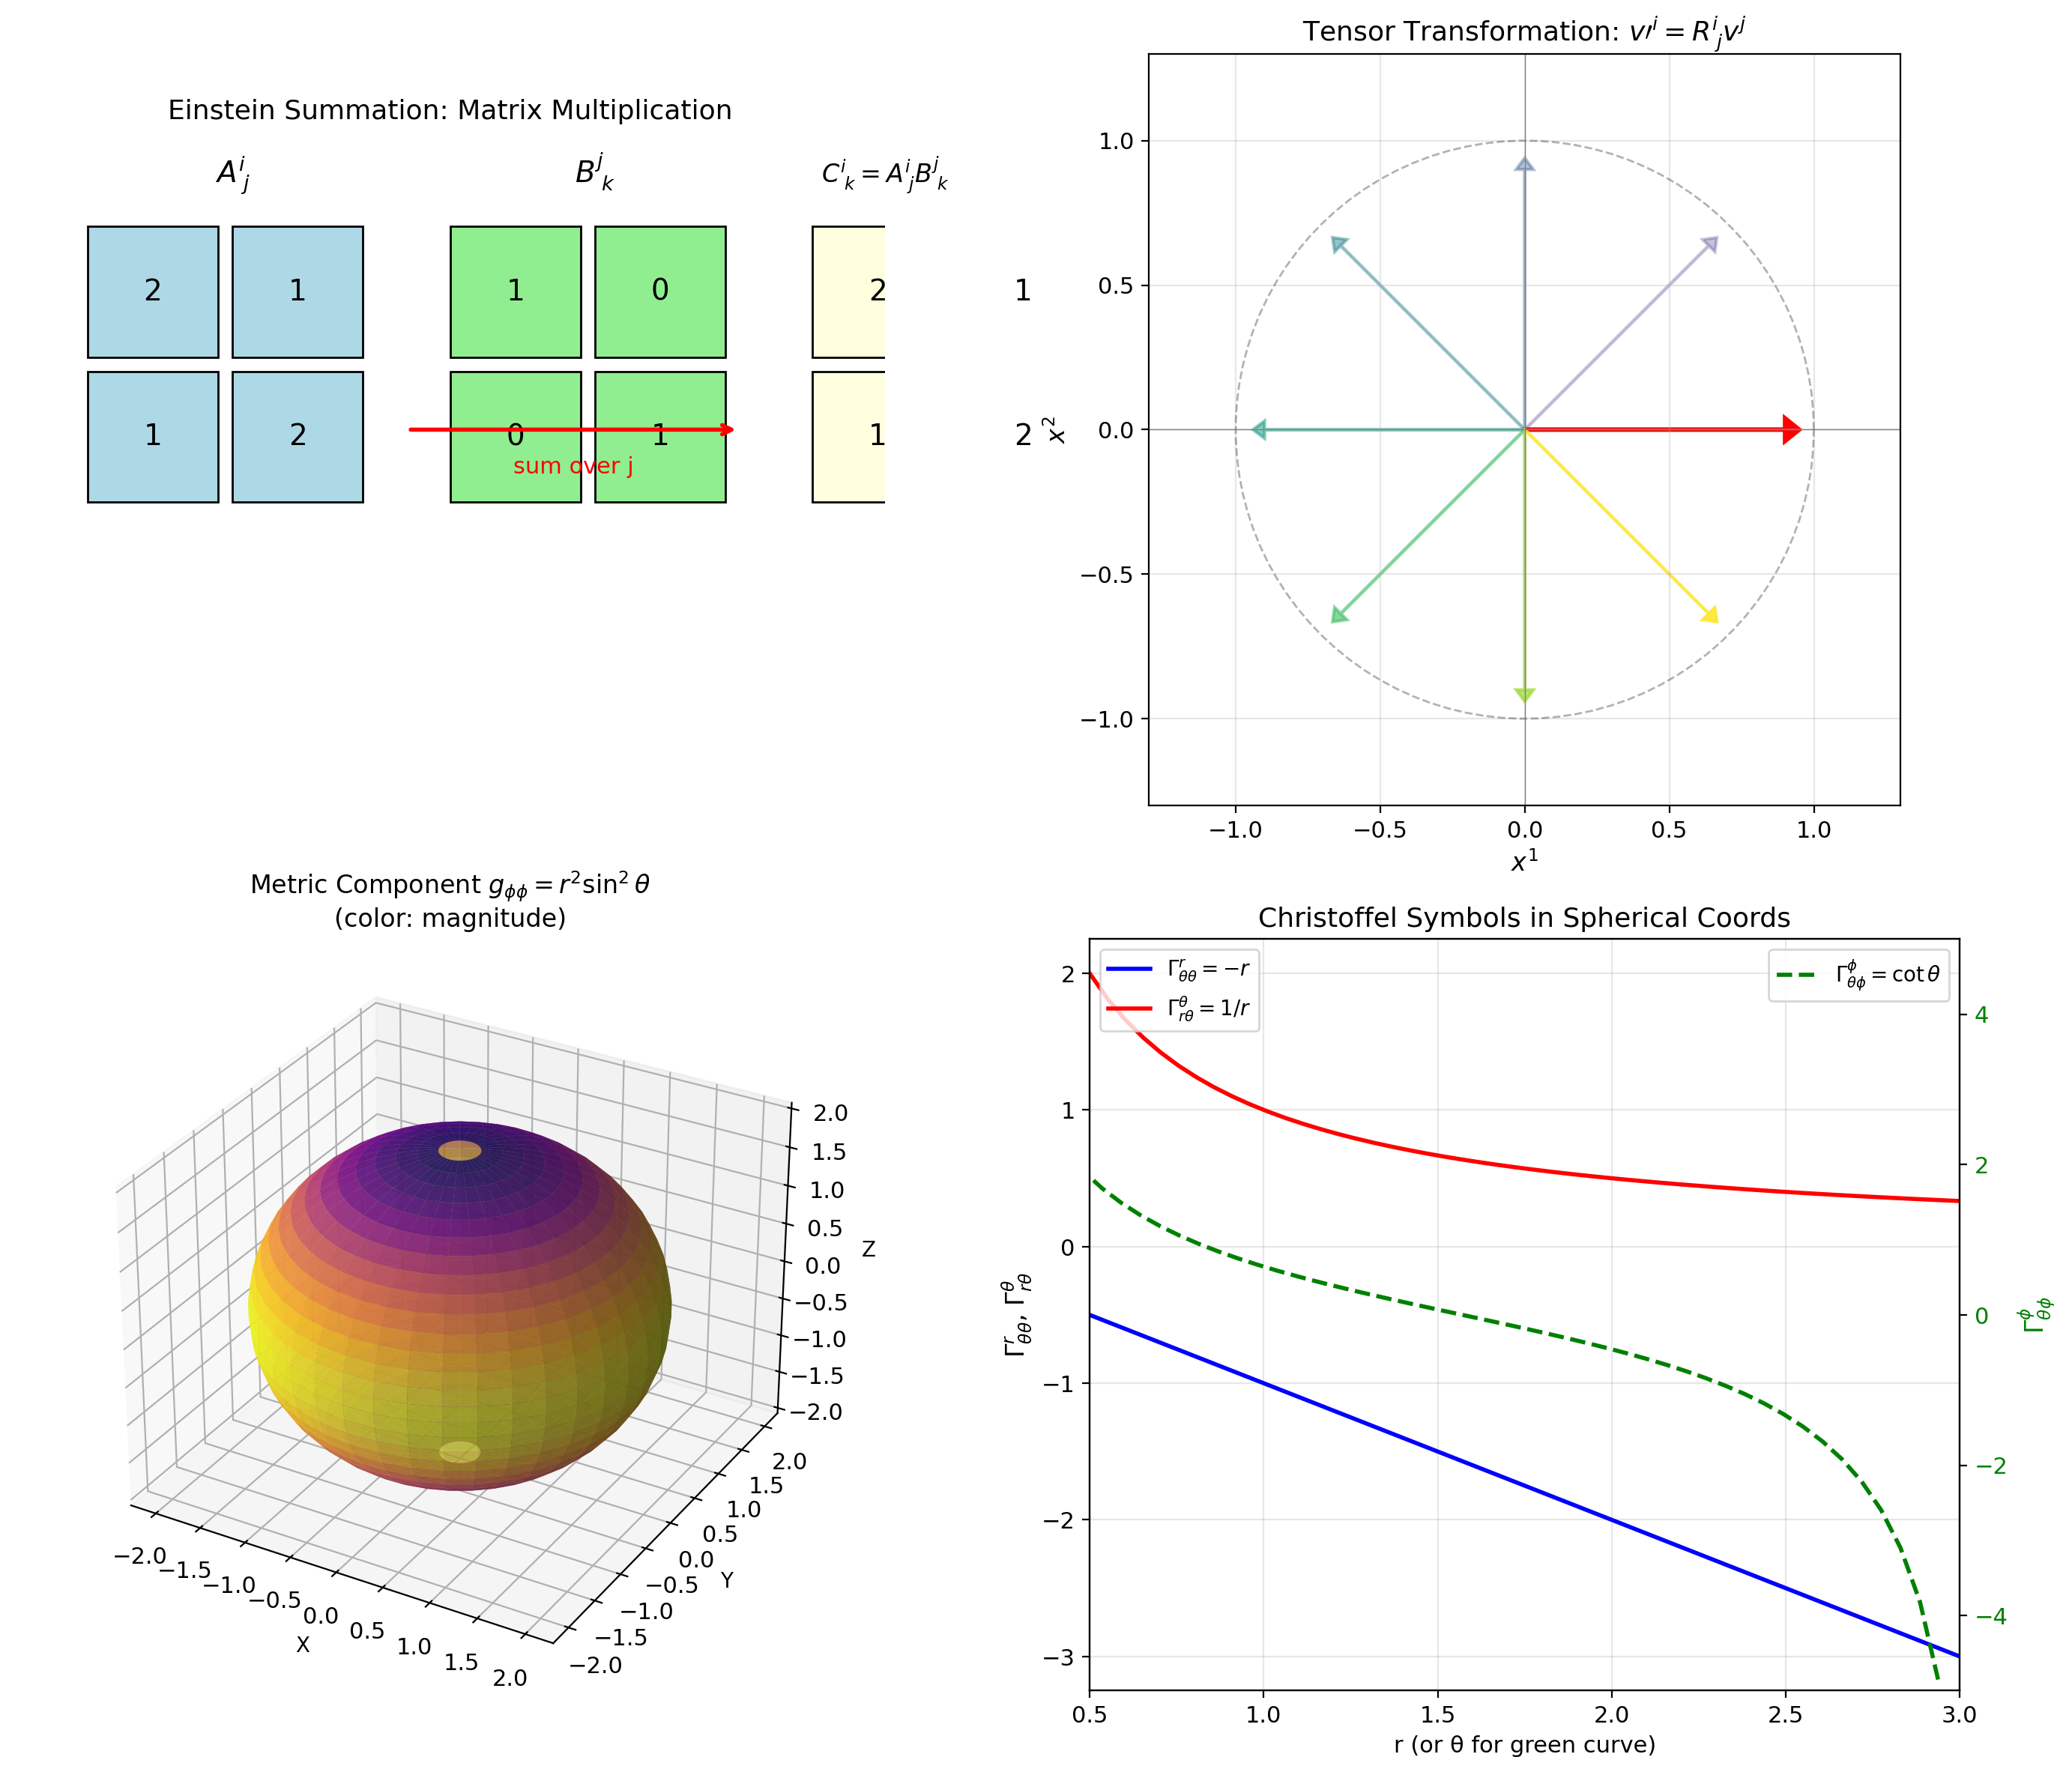


Figure saved to plot.png


In [11]:
fig = plt.figure(figsize=(14, 12))

# Panel 1: Einstein summation visualization - Matrix multiplication
ax1 = fig.add_subplot(2, 2, 1)

# Visualize the contraction in matrix multiplication
A_vis = np.array([[2, 1], [1, 2]])
B_vis = np.array([[1, 0], [0, 1]])

# Show the matrices and highlight the summation pattern
ax1.set_xlim(-0.5, 5.5)
ax1.set_ylim(-0.5, 3.5)

# Draw matrix A
for i in range(2):
    for j in range(2):
        ax1.add_patch(plt.Rectangle((j, 2-i), 0.9, 0.9, 
                                     facecolor='lightblue', edgecolor='black'))
        ax1.text(j+0.45, 2.45-i, f'{A_vis[i,j]}', ha='center', va='center', fontsize=14)

ax1.text(1, 3.2, r'$A^i_{\ j}$', ha='center', fontsize=14, fontweight='bold')

# Draw matrix B
for i in range(2):
    for j in range(2):
        ax1.add_patch(plt.Rectangle((j+2.5, 2-i), 0.9, 0.9, 
                                     facecolor='lightgreen', edgecolor='black'))
        ax1.text(j+2.95, 2.45-i, f'{B_vis[i,j]}', ha='center', va='center', fontsize=14)

ax1.text(3.5, 3.2, r'$B^j_{\ k}$', ha='center', fontsize=14, fontweight='bold')

# Draw result C = A @ B
C_vis = A_vis @ B_vis
for i in range(2):
    for j in range(2):
        ax1.add_patch(plt.Rectangle((j+5, 2-i), 0.9, 0.9, 
                                     facecolor='lightyellow', edgecolor='black'))
        ax1.text(j+5.45, 2.45-i, f'{C_vis[i,j]}', ha='center', va='center', fontsize=14)

ax1.text(5.5, 3.2, r'$C^i_{\ k} = A^i_{\ j}B^j_{\ k}$', ha='center', fontsize=12, fontweight='bold')

# Annotation showing summation
ax1.annotate('', xy=(4.5, 1.5), xytext=(2.2, 1.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.text(3.35, 1.2, 'sum over j', ha='center', fontsize=11, color='red')

ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Einstein Summation: Matrix Multiplication', fontsize=13, pad=10)

# Panel 2: Vector transformation under rotation
ax2 = fig.add_subplot(2, 2, 2)

# Original vector
v_orig = np.array([1, 0])

# Multiple rotation angles
angles = np.linspace(0, 2*np.pi, 9)[:-1]
colors = plt.cm.viridis(np.linspace(0, 1, len(angles)))

ax2.arrow(0, 0, v_orig[0]*0.9, v_orig[1]*0.9, head_width=0.08, head_length=0.05, 
         fc='red', ec='red', linewidth=2, label='Original $v^i$')

for idx, angle in enumerate(angles[1:]):
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    v_rot = np.einsum('ij,j->i', R, v_orig)
    alpha = 0.3 + 0.7 * idx / len(angles)
    ax2.arrow(0, 0, v_rot[0]*0.9, v_rot[1]*0.9, head_width=0.06, head_length=0.04,
             fc=colors[idx+1], ec=colors[idx+1], linewidth=1.5, alpha=alpha)

# Draw unit circle
theta_circle = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.cos(theta_circle), np.sin(theta_circle), 'k--', alpha=0.3, linewidth=1)

ax2.set_xlim(-1.3, 1.3)
ax2.set_ylim(-1.3, 1.3)
ax2.set_aspect('equal')
ax2.axhline(y=0, color='gray', linewidth=0.5)
ax2.axvline(x=0, color='gray', linewidth=0.5)
ax2.set_xlabel('$x^1$', fontsize=12)
ax2.set_ylabel('$x^2$', fontsize=12)
ax2.set_title(r'Tensor Transformation: $v\prime^i = R^i_{\ j} v^j$', fontsize=13)
ax2.grid(True, alpha=0.3)

# Panel 3: Metric tensor effect on line element
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

# Create a 2D surface showing ds² for different displacement directions
r_fixed = 2.0
theta_range = np.linspace(0.1, np.pi-0.1, 30)
phi_range = np.linspace(0, 2*np.pi, 40)
THETA, PHI = np.meshgrid(theta_range, phi_range)

# Unit displacement in theta direction: ds² = r² dθ²
ds2_theta = r_fixed**2 * np.ones_like(THETA)

# Unit displacement in phi direction: ds² = r² sin²θ dφ²
ds2_phi = r_fixed**2 * np.sin(THETA)**2

# Parametric surface (sphere) colored by g_φφ
X = r_fixed * np.sin(THETA) * np.cos(PHI)
Y = r_fixed * np.sin(THETA) * np.sin(PHI)
Z = r_fixed * np.cos(THETA)

# Color by g_φφ = r² sin²θ
surf = ax3.plot_surface(X, Y, Z, facecolors=plt.cm.plasma(ds2_phi / ds2_phi.max()),
                        alpha=0.8, linewidth=0, antialiased=True)

ax3.set_xlabel('X', fontsize=10)
ax3.set_ylabel('Y', fontsize=10)
ax3.set_zlabel('Z', fontsize=10)
ax3.set_title(r'Metric Component $g_{\phi\phi} = r^2\sin^2\theta$' + '\n(color: magnitude)', fontsize=12)

# Panel 4: Christoffel symbols and parallel transport
ax4 = fig.add_subplot(2, 2, 4)

# Show how Christoffel symbols vary with position
r_vals = np.linspace(0.5, 3, 50)
theta_vals = np.linspace(0.1, np.pi-0.1, 50)

# Plot key Christoffel symbols
# Γ^r_{θθ} = -r
ax4.plot(r_vals, -r_vals, 'b-', linewidth=2, label=r'$\Gamma^r_{\theta\theta} = -r$')

# Γ^θ_{rθ} = 1/r
ax4.plot(r_vals, 1/r_vals, 'r-', linewidth=2, label=r'$\Gamma^\theta_{r\theta} = 1/r$')

# Γ^φ_{θφ} = cot(θ) at fixed r
theta_plot = np.linspace(0.2, np.pi-0.2, 50)
ax4_twin = ax4.twinx()
ax4_twin.plot(theta_plot, 1/np.tan(theta_plot), 'g--', linewidth=2, 
              label=r'$\Gamma^\phi_{\theta\phi} = \cot\theta$')
ax4_twin.set_ylabel(r'$\Gamma^\phi_{\theta\phi}$', color='g', fontsize=12)
ax4_twin.tick_params(axis='y', labelcolor='g')
ax4_twin.set_ylim(-5, 5)

ax4.set_xlabel('r (or θ for green curve)', fontsize=11)
ax4.set_ylabel(r'$\Gamma^r_{\theta\theta}$, $\Gamma^\theta_{r\theta}$', fontsize=12)
ax4.set_title('Christoffel Symbols in Spherical Coords', fontsize=13)
ax4.legend(loc='upper left', fontsize=10)
ax4_twin.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0.5, 3)

plt.tight_layout()
plt.savefig('tensor_calculus_einstein_notation_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to plot.png")

## Advanced Application: Stress-Energy Tensor Contraction

In general relativity, the **stress-energy tensor** $T^{\mu\nu}$ describes the distribution of energy and momentum. The trace is:

$$T = g_{\mu\nu} T^{\mu\nu} = T^\mu_{\ \mu}$$

In [12]:
# Example: Perfect fluid stress-energy tensor in flat spacetime
# T^{μν} = (ρ + p)u^μ u^ν + p η^{μν}
# where η^{μν} = diag(-1, 1, 1, 1) is the Minkowski metric

# Minkowski metric (signature -+++)
eta = np.diag([-1.0, 1.0, 1.0, 1.0])
eta_inv = np.diag([-1.0, 1.0, 1.0, 1.0])  # Self-inverse for Minkowski

# Fluid parameters
rho = 1.0  # Energy density
p = 0.3    # Pressure

# 4-velocity of fluid at rest: u^μ = (1, 0, 0, 0)
u = np.array([1.0, 0.0, 0.0, 0.0])

# Construct T^{μν}
T_up_up = (rho + p) * np.einsum('i,j->ij', u, u) + p * eta_inv

print("Stress-Energy Tensor T^{μν} for perfect fluid at rest:")
print(T_up_up)

# Lower one index: T^μ_ν = T^{μρ} η_{ρν}
T_mixed = np.einsum('ij,jk->ik', T_up_up, eta)

print("\nMixed tensor T^μ_ν:")
print(T_mixed)

# Trace: T = T^μ_μ = η_{μν} T^{μν}
T_trace = np.einsum('ii->', T_mixed)
T_trace_alt = np.einsum('ij,ij->', eta, T_up_up)

print(f"\nTrace T = T^μ_μ = {T_trace}")
print(f"Analytical: T = -ρ + 3p = {-rho + 3*p}")

Stress-Energy Tensor T^{μν} for perfect fluid at rest:
[[1.  0.  0.  0. ]
 [0.  0.3 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.3]]

Mixed tensor T^μ_ν:
[[-1.   0.   0.   0. ]
 [ 0.   0.3  0.   0. ]
 [ 0.   0.   0.3  0. ]
 [ 0.   0.   0.   0.3]]

Trace T = T^μ_μ = -0.09999999999999998
Analytical: T = -ρ + 3p = -0.10000000000000009


## Summary

This notebook demonstrated the key concepts of tensor calculus and Einstein notation:

1. **Einstein Summation Convention**: Repeated indices imply summation
2. **Index Position**: Upper (contravariant) vs lower (covariant) indices
3. **Metric Tensor**: Defines geometry and allows index raising/lowering
4. **Tensor Operations**: Contraction, outer products, and covariant derivatives
5. **Christoffel Symbols**: Connection coefficients for curved spaces
6. **NumPy's einsum**: Direct implementation of Einstein notation

The power of this notation becomes apparent in general relativity, where equations like the **Einstein field equations**:

$$G_{\mu\nu} + \Lambda g_{\mu\nu} = \frac{8\pi G}{c^4} T_{\mu\nu}$$

can be written compactly despite representing 10 coupled nonlinear partial differential equations.